<table style='border: none' align='left'>
   <tr style='border: none'>
      <th style='border: none'><font face='verdana' size='5' color='black'><b>Use scikit-learn to predict hand-written digits</b></th>
      <th style='border: none'><img src='https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true' alt='Watson Machine Learning icon' height='40' width='40'></th>
   </tr>
   <tr style='border: none'>
       <th style='border: none'><img src='https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/hand-written-digits-recognition/images/numbers_banner-04.png' width='600' alt='Icon'> </th>
   </tr>
</table>

This notebook demonstrates how to utilize the <a href="https://pypi.python.org/pypi/watson-machine-learning-client-V4" target="_blank" rel="noopener noreferrer">watson-machine-learning-client-V4</a> package in order to save, deploy, and score a predictive model.

You will use the sample data set of hand-written digit images, `sklearn.datasets.load_digits`, which is available in scikit-learn to recognize hand-written digits.

Some familiarity with Python is helpful. This notebook is compatible with Watson Studio Desktop 1.1, Watson Machine Learning Server 1.1, and Python 3.6. It uses `scikit-learn 0.20`, and the Watson Machine Learning (WML) API client (`watson-machine-learning-client-V4`).

## Learning goals

In this notebook, you will learn how to:

-  Load a sample data set from ``scikit-learn``.
-  Explore data.
-  Split data for training and evaluation.
-  Create a scikit-learn machine learning pipeline.
-  Train and evaluate a model.
-  Store the model in the project on WSD, or the deployment space using WML Server.
-  Deploy the model for online scoring in the deployment space.
-  Score test records.


## Table of Contents

1.	[Load and explore data](#load)
2.	[Create a scikit-learn model](#model)<br>
    2.1 [Split data](#prep)<br>
    2.2 [Create a scikit-learn machine learning pipeline](#pipe)<br>
    2.3 [Train a model](#train)<br>
3.  [Setting up](#setup)<br>
    3.1 [Connecting to Watson Studio Desktop](#wsd) <br>
    3.2 [Connecting to Watson Machine Learning Server](#wmls) <br>
4.	[Save the model](#save)<br>
5.	[Deploy the model and score data (WML Server only)](#deploy)<br>
    5.1 [Create an online deployment for the published model](#create)<br>
    5.2 [Obtain deployments](#getdeploy)<br>
    5.3 [Score data](#score)<br>
    5.4 [Delete the deployment](#deldeploy)<br>
    5.5 [Delete the model](#delmodel)
6.	[Summary and next steps](#summary)

To get started on Watson Machine Learning (WML) Server, find documentation on installion and set up <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/wmls/wmls-install-over.html" target="_blank" rel="noopener no referrer">here</a>.


- Configure your local python environment:
  + Python 3.6
  + scikit-learn 0.20.4
  + watson-machine-learning-client-V4

<a id='load'></a>
## 1. Load and explore data

In this section, you load the data from scikit-learn sample data sets and perform basic exploratory data analysis (EDA).

<div class="alert alert-block alert-warning">
To simply hide the output of pip install instead, use <tt>-q</tt> after <tt>!pip install</tt>.
</div>

In [1]:
!pip install -q scikit-learn==0.20.4

In [2]:
# Load the data.
from sklearn import datasets

# Description of the Digits Data set.
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

The sample data set consists of 8x8 pixel images of hand-written digits.

In [3]:
digits.data.shape

(1797, 64)

Display the first digit data and label using **data** and **target**. The hand-written digit shown below is an 8x8 pixel image represented by an array.

In [4]:
print(digits.data[0].reshape((8, 8)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [5]:
digits.target[0]

0

In [6]:
from matplotlib.pyplot import gray, subplots

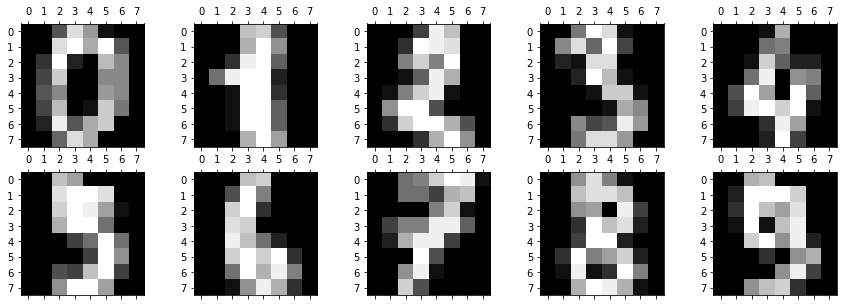

In [7]:
# Visualize some digits from the data set.
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9,
                                ax10)) = subplots(2, 5, figsize=(15, 5))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in range(len(ax)):
    gray()
    ax[i].matshow(digits.images[i])

In [8]:
# Labels for the written digits displayed above.
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In the next step, count the data examples.

In [9]:
# Calculate the number of samples.
samples_count = len(digits.images)

print('Number of samples: {}'.format(samples_count))

Number of samples: 1797


<a id='model'></a>
## 2. Create a scikit-learn model

In this section you learn how to:
- [2.1 Split data](#prep)
- [2.2 Create a scikit-learn machine learning pipeline](#pipe)
- [2.3 Train a model](#train)

### 2.1 Split data<a id='prep'></a>

In this subsection you will split your data into: 
- Train set
- Test set
- Score set

In [10]:
# Split the data into data sets and display the number of records for each data set.
train_data = digits.data[:int(.7 * samples_count)]
train_labels = digits.target[:int(.7 * samples_count)]

test_data = digits.data[int(.7 * samples_count):int(.9 * samples_count)]
test_labels = digits.target[int(.7 * samples_count):int(.9 * samples_count)]

score_data = digits.data[int(.9 * samples_count):]

print('Number of training records: {}'.format(len(train_data)))
print('Number of testing records : {}'.format(len(test_data)))
print('Number of scoring records : {}'.format(len(score_data)))

Number of training records: 1257
Number of testing records : 360
Number of scoring records : 180


Your data has been successfully split into three sets: 

-  The train set, which is the largest group, is used for training.
-  The test set is used for model evaluation and to test the assumptions of the model.
-  The score set is used for scoring the deployed model.

### 2.2 Create a scikit-learn machine learning pipeline<a id='pipe'></a>

In this section, you will create a scikit-learn machine learning pipeline and then train the model.

First, import the scikit-learn machine learning modules that are needed in the subsequent steps.

In [11]:
# Import scikit-learn modules.
from sklearn.pipeline import Pipeline
from sklearn import metrics, preprocessing, svm

Standardize the features by removing the mean and scaling to unit variance.

In [12]:
scaler = preprocessing.StandardScaler()

Next, define the estimators you want to use for classification. The following example uses Support Vector Machines (SVM) with the radial basis function (used for non-linear data) as the kernel.

In [13]:
clf = svm.SVC(kernel='rbf', gamma='auto')

Build a pipeline. The pipeline consists of a transformer and estimator.

In [14]:
pipeline = Pipeline([('scaler', scaler), ('svc', clf)])

### 2.3 Train a model<a id='train'></a>

Now, you can use the **pipeline** and **train data** you defined previously to train your SVM model.

In [15]:
model = pipeline.fit(train_data, train_labels)

Use **test data** to generate an evaluation report to check your **model quality**.

In [16]:
# Evaluate your model.
predicted = model.predict(test_data)

print('Evaluation report: \n\n{}'.format(
    metrics.classification_report(test_labels, predicted)))

Evaluation report: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      0.97      0.97        34
           2       1.00      0.97      0.99        36
           3       1.00      0.94      0.97        35
           4       0.78      0.97      0.87        37
           5       0.97      0.97      0.97        38
           6       0.97      0.86      0.91        36
           7       0.92      0.97      0.94        35
           8       0.91      0.89      0.90        35
           9       0.97      0.92      0.94        37

   micro avg       0.94      0.94      0.94       360
   macro avg       0.95      0.94      0.95       360
weighted avg       0.95      0.94      0.95       360



<div class="alert-block alert-info"><br>&nbsp;&nbsp;&nbsp;&nbsp;You can tune your model, or try to create classification models to achieve better accuracy. For the simplicity purpose of this example, the tuning and model selections are omitted.<br><br></div>

## 3. Setting up <a id="setup"></a>

In this section, you will learn how to use the python client to connect to both `Watson Studio Desktop (WSD)` and `Watson Machine Learning (WML) Server`. If you only intend to save the model on WSD, you will need to follow the steps in section [3.1 Connecting to Watson Studio Desktop](#wsd).

If you want to use the WML Server, you will need to refer to section [3.2 Connecting to Watson Machine Learning Server](#wmls). From there, you will be able to save, deploy, and score the model in your deployment space on the WML Server.

First, import the `watson-machine-learning-client` module and authenticate the service instance.

<div class="alert-block alert-info">
    <br>&nbsp;&nbsp;&nbsp;&nbsp;You can find more information about the watson-machine-learning-client <a href="https://wml-api-pyclient-dev-v4.mybluemix.net/">here</a>.
    <br><br>
</div>

In [17]:
!pip install -q --upgrade watson-machine-learning-client-V4

First, import the `watson-machine-learning-client` module and authenticate the service instance.

In [18]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

### 3.1 Connecting to Watson Studio Desktop <a id="wsd"></a>

To associate the python client with Watson Studio Desktop, use the following credentials.

In [19]:
from project_lib.utils import environment

url = environment.get_common_api_url()
wml_credentials = {
    'instance_id': 'wsd_local',
    'url': url,
    'version': '1.1'
}

Now, instantiate a `WatsonMachineLearningAPIClient` object.

In [20]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [21]:
client.version

'1.0.112'

Setting the default project is mandatory when you use WSD. You can use the cell below.

In [22]:
from project_lib import Project

project = Project.access()
project_id = project.get_metadata()['metadata']['guid']
client.set.default_project(project_id)

'SUCCESS'

To proceed, you can go directly to the section [4. Save the model](#save).

<a id="wmls"></a>
### 3.2 Connecting to Watson Machine Learning Server <a id="wmls"></a>

In this subsection, you will learn how to set up the Watson Machine learning (WML) Server that is required to save, deploy, and score the model in the Watson Machine learning (WML) repository.

**Connect to the Watson Machine Learning Server using the Python client**<br><br>

<div class="alert-block alert-info">
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;To install the Watson Machine Learning Server, follow <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/wmls/wmls-install-over.html" target="_blank" rel="noopener no referrer">these documentation steps</a>.<br><br>
    &nbsp;&nbsp;&nbsp;&nbsp;To connect to the WML server and find your authentication information (your credentials) follow the steps provided here in the <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/wmls/wmls-connect.html" target="_blank" rel="noopener no referrer">Documentation</a>.
    <br><br>
</div>

**Action**: Enter your WML Server credentials in the following cell.

In [23]:
# Enter your credentials here.
wml_credentials = {
    'url': '<URL>:31843',
    'username': '---',
    'password': '---',
    'instance_id': 'wml_local',
    'version': '2.0'
}

In [24]:
# @hidden_cell

wml_credentials = {
    'url': 'https://wmlserver-dev-test.ml.test.cloud.ibm.com:31843',
    'username': 'admin',
    'password': 'password',
    'instance_id': 'wml_local',
    'version': '2.0'
}

Instantiate the WatsonMachineLearningAPIClient object.

In [25]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [26]:
client.version

'1.0.112'

Since you are using WML Server in this section, you can obtain the space UID by using the following cells.<br><br>

<div class="alert-block alert-info"><br>
&nbsp;&nbsp;&nbsp;&nbsp;You can create your own <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/analyze-data/ml-spaces_local.html" target="_blank" rel="noopener no referrer">deployment space</a> by selecting <b>Deployment Spaces</b> from the Navigation Menu on the top left of this page.<br><br></div>

Alternatively, you can create a deployment and obtain its UID using the code in the following cell.

In [27]:
# Obtain the UId of your space
def guid_from_space_name(client, space_name):
    instance_details = client.service_instance.get_details()
    space = client.spaces.get_details()
    return (next(item for item in space['resources']
                 if item['entity']['name'] == space_name)['metadata']['guid'])

**Action:** Enter the name of your deployment space in the code below: `space_uid = guid_from_space_name(client, 'YOUR_DEPLOYMENT_SPACE')`.

In [28]:
# Enter the name of your deployment space here:
space_uid = guid_from_space_name(client, 'YOUR_DEPLOYMENT_SPACE')
print('Space UID = {}'.format(space_uid))

Space UID = 3ce5e796-f127-431a-9609-46456e10d274


Setting the default space is mandatory when you use WML Server. You can set this using the cell below.

In [29]:
client.set.default_space(space_uid)

'SUCCESS'

## 4. Save the model <a id="save"></a>

First, you need to create the model metadata.

In [30]:
# Model Metadata.
software_spec_uid = client.software_specifications.get_uid_by_name(
    'scikit-learn_0.20-py3.6')

meta_props={
    client.repository.ModelMetaNames.NAME: 'Digits prediction model',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.20'
}

You can extract the model UID from the saved model details.

In [31]:
# Create the model artifact.
model_artifact = client.repository.store_model(model,
                                               meta_props=meta_props,
                                               training_data=train_data,
                                               training_target=train_labels)
model_uid = client.repository.get_model_uid(model_artifact)
print('Model UID = {}'.format(model_uid))

Model UID = 786438a1-6b75-49aa-886a-5e0912e9f278


Obtain the saved model metadata from WML using the model UID.

In [32]:
from json import dumps

# Details about the model.
model_details = client.repository.get_details(model_uid)
print(dumps(model_details, indent=4))

{
    "metadata": {
        "name": "Digits prediction model",
        "guid": "786438a1-6b75-49aa-886a-5e0912e9f278",
        "id": "786438a1-6b75-49aa-886a-5e0912e9f278",
        "modified_at": "2020-08-28T16:37:31.002Z",
        "created_at": "2020-08-28T16:37:30.002Z",
        "owner": "1000330999",
        "href": "/v4/models/786438a1-6b75-49aa-886a-5e0912e9f278?space_id=3ce5e796-f127-431a-9609-46456e10d274",
        "space_id": "3ce5e796-f127-431a-9609-46456e10d274"
    },
    "entity": {
        "name": "Digits prediction model",
        "training_data_references": [
            {
                "location": {
                    "bucket": "not_applicable"
                },
                "type": "fs",
                "connection": {
                    "access_key_id": "not_applicable",
                    "secret_access_key": "not_applicable",
                    "endpoint_url": "not_applicable"
                },
                "schema": {
                    "id": "1",
  

You can list all stored models using the `list_models` method.

In [33]:
# Display a list of all the models.
models_details = client.repository.list_models()

------------------------------------  -----------------------  ------------------------  -----------------
GUID                                  NAME                     CREATED                   TYPE
786438a1-6b75-49aa-886a-5e0912e9f278  Digits prediction model  2020-08-28T16:37:30.002Z  scikit-learn_0.20
------------------------------------  -----------------------  ------------------------  -----------------


<div class="alert-block alert-info"><br>
&nbsp;&nbsp;&nbsp;&nbsp;From the list of stored models, you can see that model is successfully saved. <br>

&nbsp;&nbsp;&nbsp;&nbsp;With Watson Studio Desktop credentials, this means you have saved the model in your project.<br>&nbsp;&nbsp;&nbsp;&nbsp;You can see the saved model in your project UI by clicking on your project name in the breadcrumb at the top of the application. <br>

&nbsp;&nbsp;&nbsp;&nbsp;With WML Server credentials, this means that you have saved the model in your deployment space.<br>&nbsp;&nbsp;&nbsp;&nbsp;You can view your model by selecting <b>Deployment Spaces</b> from the Navigation Menu and clicking on your deployment space name.<br>
<br></div>

If you are using WML Server, proceed to section [5. Deploy the model and score data (WML Server only)](#deploy). If you are using Watson Studio Desktop, you may skip to the [summary](#summary).

<a id='deploy'></a>
## 5. Deploy the model and score data (WML Server only)

In this section, you will learn how to use the WML API client to perform online scoring and score a test data record.

- [5.1 Create an online deployment for the published model](#create)
- [5.2 Obtain deployments](#getdeploy)
- [5.3 Score data](#score)
- [5.4 Delete the deployment](#deldeploy)
- [5.5 Delete the model](#delmodel)


### 5.1 Create an online deployment for the published model<a id='create'></a>

Now, you can create a deployment, *Deployment of scikit handwritten digits model* using deployment metadata and the model UID obtained in the previous section.

In [34]:
# Deployment metadata.
deploy_meta = {
    client.deployments.ConfigurationMetaNames.NAME:
    'Deployment of scikit handwritten digits model',
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [35]:
# Create the deployment.
deploy_details = client.deployments.create(model_uid, meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '786438a1-6b75-49aa-886a-5e0912e9f278' started

#######################################################################################


initializing..
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='eabc4ff8-2278-4bd4-9173-d2d9ce6b6230'
------------------------------------------------------------------------------------------------




Get the list of all the deployments in the deployment space.

In [36]:
# List the deployments.
client.deployments.list()

------------------------------------  ---------------------------------------------  -----  ------------------------  -------------
GUID                                  NAME                                           STATE  CREATED                   ARTIFACT_TYPE
eabc4ff8-2278-4bd4-9173-d2d9ce6b6230  Deployment of scikit handwritten digits model  ready  2020-08-28T16:37:34.406Z  model
------------------------------------  ---------------------------------------------  -----  ------------------------  -------------


The model has been successfully deployed.<br><br>

### 5.2 Obtain deployments<a id='getdeploy'></a>

You can obtain the `deployment_uid` by parsing the deployment details for the last deployed model.

In [37]:
# Deployment UID.
deployment_uid = client.deployments.get_uid(deploy_details)
print('Deployment UID = {}'.format(deployment_uid))

Deployment UID = eabc4ff8-2278-4bd4-9173-d2d9ce6b6230


### 5.3 Score data<a id='score'></a>

Use the following method to run a test scoring request against the deployed model.

**Action**: Prepare scoring payload with the records to score.

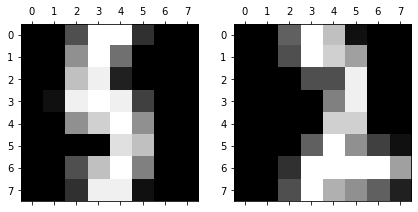

In [38]:
from numpy import array

# Prepare scoring payload.
job_payload = {
    client.deployments.ScoringMetaNames.INPUT_DATA: [{
        'values': [list(score_data[0]),
                   list(score_data[1])]
    }]
}

f, (ax1, ax2) = subplots(1, 2, figsize=(7, 4))
ax = [ax1, ax2]

for i in range(len(ax)):
    gray()
    ax[i].matshow(
        array(job_payload['input_data'][0]['values'][i]).reshape((8, 8)))

Use the ``client.deployments.score()`` method to run the scoring.

In [39]:
# Perform prediction and display the result.
job_details = client.deployments.score(deployment_uid, job_payload)
print(dumps(job_details, indent=4))

{
    "predictions": [
        {
            "fields": [
                "prediction"
            ],
            "values": [
                [
                    5
                ],
                [
                    2
                ]
            ]
        }
    ]
}


The model had predicted the numbers `5` and `2` respectively.

In [40]:
digits.target[int(.9 * samples_count):int(.9 * samples_count) + 2]

array([5, 2])

As you can see, the model has succesfully predicted the values.

### 5.4 Delete the deployment<a id='deldeploy'></a>

Use the following method to delete the deployment.

In [41]:
# Delete deployment.
client.deployments.delete(client.deployments.get_uid(deploy_details))

'SUCCESS'

You can check if your deployment has deleted successfully by generating a list of the saved deployments in the space:

In [42]:
# List the deployments.
client.deployments.list()

----  ----  -----  -------  -------------
GUID  NAME  STATE  CREATED  ARTIFACT_TYPE
----  ----  -----  -------  -------------


### 5.5 Delete the model<a id='delmodel'></a>

In [43]:
# Delete model.
client.repository.delete(model_uid)

'SUCCESS'

You can check if your model has deleted successfully by generating a list of your saved models in the deployment space:

In [44]:
# List the models.
client.repository.list_models()

----  ----  -------  ----
GUID  NAME  CREATED  TYPE
----  ----  -------  ----


<a id='summary'></a>
## 6. Summary and next steps     

You successfully completed this notebook! 
 
You learned how to use the scikit-learn machine learning as well as the Watson Machine Learning (WML) API client for model creation and deployment. 

### Resources <a id="resources"></a>

To learn more about configurations used in this notebook or more sample notebooks, tutorials, documentation, how-tos, and blog posts, check out these links:

<div class="alert alert-block alert-success"><a id="resources"></a>

<h4>IBM documentation</h4>
<br>
 <li> <a href="https://wml-api-pyclient-dev-v4.mybluemix.net" target="_blank" rel="noopener no referrer">watson-machine-learning</a></li> 
 <li> <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/wmls/overview.html" target="_blank" rel="noopener noreferrer">Watson Machine Learning Server</a></li>
 
<h4> IBM Samples</h4>
<br>
 <li> <a href="https://github.com/IBMDataScience/sample-notebooks" target="_blank" rel="noopener noreferrer">Sample notebooks</a></li>
 
<h4> Others</h4>
<br>
 <li> <a href="https://www.python.org" target="_blank" rel="noopener noreferrer">Official Python website</a></li>
 <li> <a href="https://matplotlib.org" target="_blank" rel="noopener noreferrer">Matplotlib: Python plotting</a></li>
 <li> <a href="https://numpy.org/" target="_blank" rel="noopener noreferrer">Numpy</a></li>
 <li> <a href="https://scikit-learn.org/" target="_blank" rel="noopener noreferrer">scikit-learn</a></li>
</div>

### Authors

**Wojciech Sobala** is a Data Scientist at IBM developing enterprise-level applications that substantially increases clients' ability to turn data into actionable knowledge.  
**Ananya Kaushik** is a Data Scientist at IBM.

Copyright © 2017-2020 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style='background:#F5F7FA; height:110px; padding: 2em; font-size:14px;'>
<span style='font-size:18px;color:#152935;'>Love this notebook? </span>
<span style='font-size:15px;color:#152935;float:right;margin-right:40px;'>Don't have an account yet?</span><br>
<span style='color:#5A6872;'>Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style='border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;'><a href='https://ibm.co/wsnotebooks' target='_blank' style='color: #3d70b2;text-decoration: none;'>Sign Up</a></span><br>
</div>